In [45]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV into a pandas DataFrame
df = pd.read_csv('netflix_titles.csv')

# Create SQLite database file
conn = sqlite3.connect('netflix.db')

# DataFrame to SQL table named 'netflix'
df.to_sql('netflix', conn, if_exists='replace', index=False)

8807

In [46]:
# Run SQL queries
query = """
SELECT type, COUNT(*) as count
FROM netflix
GROUP BY type
"""

result = pd.read_sql_query(query, conn)
print(result)

      type  count
0    Movie   6131
1  TV Show   2676


In [72]:
# Count movies vs TV shows
query1 = """
SELECT type, COUNT(*) AS count
FROM netflix
GROUP BY type;
"""
result1 = pd.read_sql_query(query1, conn)
print("Query 1: Count movies vs TV shows")
print(result1, '\n')

Query 1: Count movies vs TV shows
      type  count
0    Movie   6131
1  TV Show   2676 



/var/folders/cy/83tkxmpn62n1jzg0b5w_m9w00000gn/T/ipykernel_21501/3129601986.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result1, x='type', y='count', palette='pastel')


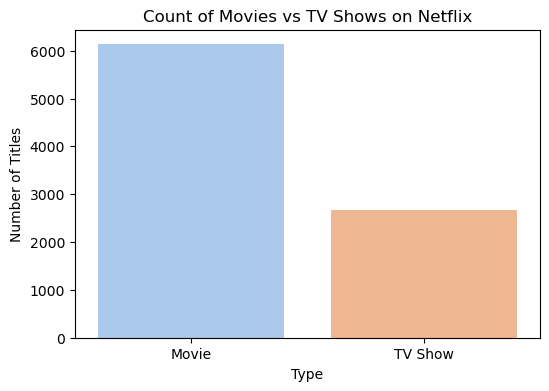

In [71]:
# Plot movies vs TV shows
plt.figure(figsize=(6,4))
sns.barplot(data=result1, x='type', y='count', palette='pastel')
plt.title('Count of Movies vs TV Shows on Netflix')
plt.ylabel('Number of Titles')
plt.xlabel('Type')
plt.show()

In [70]:
# Number of titles added each year
query2 = """
SELECT release_year, COUNT(*) AS titles_added
FROM netflix
GROUP BY release_year
ORDER BY release_year;
"""
result2 = pd.read_sql_query(query2, conn)
print("Query 2: Number of titles added each year")
print(result2, '\n')

Query 2: Number of titles added each year
    release_year  titles_added
0           1925             1
1           1942             2
2           1943             3
3           1944             3
4           1945             4
..           ...           ...
69          2017          1032
70          2018          1147
71          2019          1030
72          2020           953
73          2021           592

[74 rows x 2 columns] 



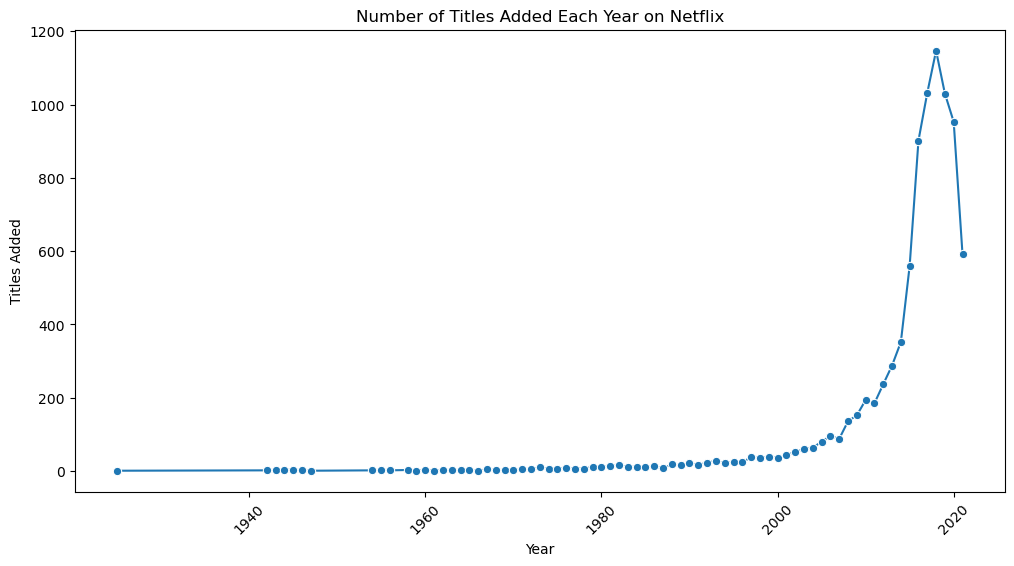

In [69]:
# Plot of titles added per year 
plt.figure(figsize=(12,6))
sns.lineplot(data=result2, x='release_year', y='titles_added', marker='o')
plt.title('Number of Titles Added Each Year on Netflix')
plt.ylabel('Titles Added')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.show()

In [68]:
# How many titles added per year
query = """
SELECT release_year, COUNT(*) as titles_added
FROM netflix
GROUP BY release_year
ORDER BY release_year
"""

result = pd.read_sql_query(query, conn)
print(result)

    release_year  titles_added
0           1925             1
1           1942             2
2           1943             3
3           1944             3
4           1945             4
..           ...           ...
69          2017          1032
70          2018          1147
71          2019          1030
72          2020           953
73          2021           592

[74 rows x 2 columns]


In [67]:
# Top 10 countries producing the most Netflix titles
query3 = """
SELECT country, COUNT(*) AS title_count
FROM netflix
WHERE country IS NOT NULL
GROUP BY country
ORDER BY title_count DESC
LIMIT 10;
"""
result3 = pd.read_sql_query(query3, conn)
print("Query 3: Top 10 countries producing most Netflix titles")
print(result3, '\n')

Query 3: Top 10 countries producing most Netflix titles
          country  title_count
0   United States         2818
1           India          972
2  United Kingdom          419
3           Japan          245
4     South Korea          199
5          Canada          181
6           Spain          145
7          France          124
8          Mexico          110
9           Egypt          106 



          country  title_count
0   United States         2818
1           India          972
2  United Kingdom          419
3           Japan          245
4     South Korea          199
5          Canada          181
6           Spain          145
7          France          124
8          Mexico          110
9           Egypt          106


/var/folders/cy/83tkxmpn62n1jzg0b5w_m9w00000gn/T/ipykernel_21501/2518621420.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result3, y='country', x='title_count', palette='muted')


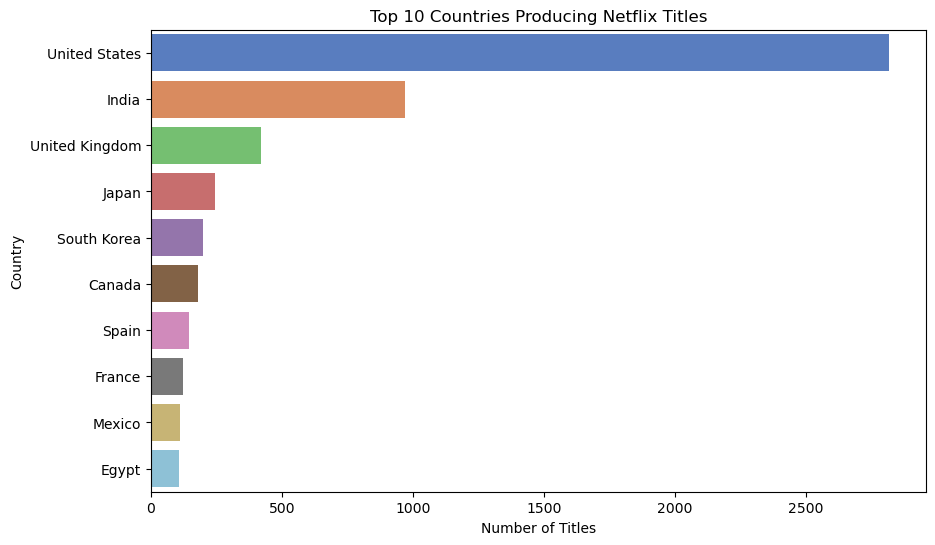

In [66]:
# Plot of top 10 countries producing the most Netflix titles
result3 = pd.read_sql_query(query3, conn)
print(result3)

plt.figure(figsize=(10,6))
sns.barplot(data=result3, y='country', x='title_count', palette='muted')
plt.title('Top 10 Countries Producing Netflix Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

In [65]:
# Count titles containing 'Drama' in genres
query4 = """
SELECT COUNT(*) AS drama_titles
FROM netflix
WHERE listed_in LIKE '%Drama%';
"""
result4 = pd.read_sql_query(query4, conn)
print("Query 4: Count of titles with 'Drama' genre")
print(result4, '\n')

Query 4: Count of titles with 'Drama' genre
   drama_titles
0          3190 



In [64]:
# Average duration of movies and average seasons of TV shows
query5 = """
SELECT 
  AVG(CAST(REPLACE(duration, ' min', '') AS INTEGER)) AS avg_movie_duration_min,
  AVG(CAST(REPLACE(duration, ' Season', '') AS INTEGER)) AS avg_tv_seasons
FROM netflix
WHERE duration IS NOT NULL;
"""
result5 = pd.read_sql_query(query5, conn)
print("Query 5: Average movie duration (min) and average TV show seasons")
print(result5, '\n')

Query 5: Average movie duration (min) and average TV show seasons
   avg_movie_duration_min  avg_tv_seasons
0               69.846888       69.846888 



In [63]:
# Count of titles by rating
query6 = """
SELECT rating, COUNT(*) AS count
FROM netflix
GROUP BY rating
ORDER BY count DESC;
"""
result6 = pd.read_sql_query(query6, conn)
print("Query 6: Count of titles by rating")
print(result6, '\n')

Query 6: Count of titles by rating
      rating  count
0      TV-MA   3207
1      TV-14   2160
2      TV-PG    863
3          R    799
4      PG-13    490
5      TV-Y7    334
6       TV-Y    307
7         PG    287
8       TV-G    220
9         NR     80
10         G     41
11  TV-Y7-FV      6
12      None      4
13        UR      3
14     NC-17      3
15    84 min      1
16    74 min      1
17    66 min      1 



/var/folders/cy/83tkxmpn62n1jzg0b5w_m9w00000gn/T/ipykernel_21501/2367575162.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result6, y='rating', x='count', palette='coolwarm')


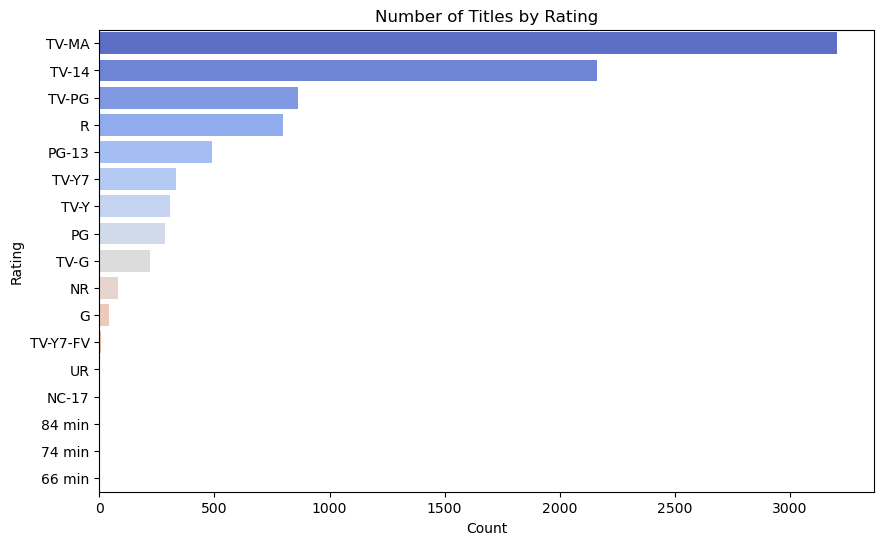

In [62]:
# Plot of titles rating
plt.figure(figsize=(10,6))
sns.barplot(data=result6, y='rating', x='count', palette='coolwarm')
plt.title('Number of Titles by Rating')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

In [61]:
# Top 5 directors with the most titles
query7 = """
SELECT director, COUNT(*) AS title_count
FROM netflix
WHERE director IS NOT NULL
GROUP BY director
ORDER BY title_count DESC
LIMIT 5;
"""
result7 = pd.read_sql_query(query7, conn)
print("Query 7: Top 5 directors with most Netflix titles")
print(result7, '\n')

Query 7: Top 5 directors with most Netflix titles
                 director  title_count
0           Rajiv Chilaka           19
1  Raúl Campos, Jan Suter           18
2             Suhas Kadav           16
3            Marcus Raboy           16
4               Jay Karas           14 



In [60]:
# Titles containing "Love" in the title
query8 = """
SELECT title, type, release_year
FROM netflix
WHERE title LIKE '%Love%'
ORDER BY release_year DESC;
"""
result8 = pd.read_sql_query(query8, conn)
print('Query 8: Titles containing "Love" in the title')
print(result8, '\n')

Query 8: Titles containing "Love" in the title
                               title     type  release_year
0               Love on the Spectrum  TV Show          2021
1                        Man in Love    Movie          2021
2                     Resort to Love    Movie          2021
3    The Last Letter From Your Lover    Movie          2021
4                        Lethal Love    Movie          2021
..                               ...      ...           ...
191        Why Do Fools Fall in Love    Movie          1998
192                       Love Jones    Movie          1997
193  A Thin Line Between Love & Hate    Movie          1996
194                 Love on Delivery    Movie          1994
195            For the Love of Benji    Movie          1977

[196 rows x 3 columns] 



In [59]:
# Titles from 2020 longer than 100 minutes
query10 = """
SELECT title, duration, type
FROM netflix
WHERE release_year = 2020
  AND type = 'Movie'
  AND CAST(REPLACE(duration, ' min', '') AS INTEGER) > 100;
"""
result10 = pd.read_sql_query(query10, conn)
print("Query 10: 2020 movies longer than 100 minutes")
print(result10, '\n')

Query 10: 2020 movies longer than 100 minutes
                     title duration   type
0           Tughlaq Durbar  145 min  Movie
1     Omo Ghetto: the Saga  147 min  Movie
2           Shadow Parties  117 min  Movie
3                  Shikara  115 min  Movie
4           A Faraway Land  102 min  Movie
..                     ...      ...    ...
209             37 Seconds  116 min  Movie
210          Shimla Mirchi  121 min  Movie
211      A Fall from Grace  121 min  Movie
212  Live Twice, Love Once  102 min  Movie
213          Ghost Stories  145 min  Movie

[214 rows x 3 columns] 



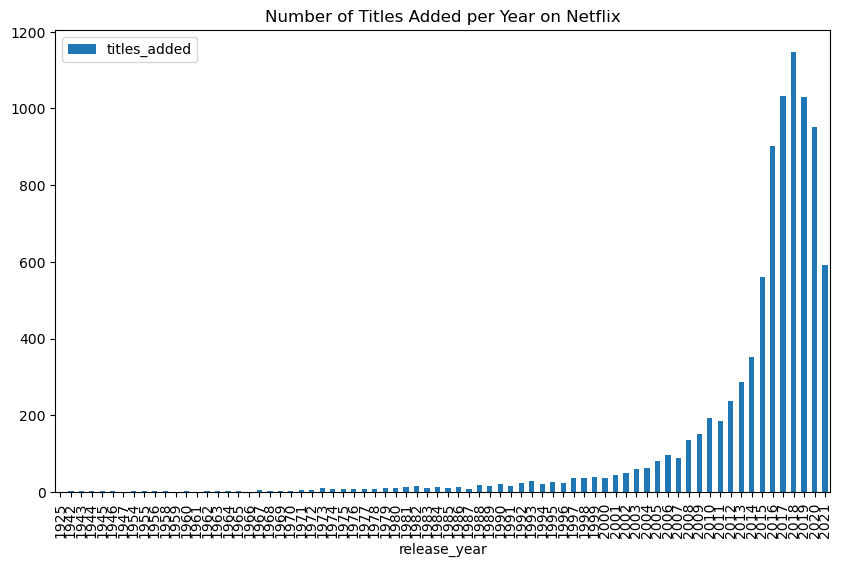

In [57]:
# Visualize SQL query results
import matplotlib.pyplot as plt

result.plot(x='release_year', y='titles_added', kind='bar', figsize=(10,6))
plt.title('Number of Titles Added per Year on Netflix')
plt.show()
